In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
os.getcwd()

'/mnt/HDD/wewe1117/python_folder/pibo_constraints/CiBO'

In [2]:
def get_cum_max(array):
    """
    Calculate the cumulative maximum of a numpy array.
    """
    # Initialize an empty list to store the cumulative maximum
    cum_max = []
    # Iterate through the array and calculate the cumulative maximum
    for i in range(len(array)):
        if i == 0:
            cum_max.append(array[i])
        else:
            cum_max.append(max(cum_max[i-1], array[i]))
    return np.array(cum_max)

In [3]:
def load_data(alg, task, dim, seed, n_init, indicator, batch_size, max_evals, coeff, buffer_size=None, lamb=None):
    path = f'{os.getcwd()}/baselines/results/{alg}/'
    if lamb == None and buffer_size != None:
        filename = f'{alg}_{task}_{dim}_{seed}_{n_init}_{indicator}_{batch_size}_{buffer_size}_{coeff}_{max_evals}_{max_evals}.npy'
    elif buffer_size == None and lamb == None:
        filename = f'{alg}_{task}_{dim}_{seed}_{n_init}_{indicator}_{batch_size}_{coeff}_{max_evals}_{max_evals}.npy'
    else:
        print(f"Loading data with buffer_size: {alg}_{task}_{dim}_{seed}_{n_init}_{indicator}_{batch_size}_{coeff}_{max_evals}_{max_evals}.npy")
        filename = f'{alg}_{task}_{dim}_{seed}_{n_init}_{indicator}_{lamb}_{batch_size}_{buffer_size}_{coeff}_{max_evals}_{max_evals}.npy'
    try:
        data = np.load(f"{path}{filename}")
    except FileNotFoundError:
        print(f"File not found: {path}{filename}")
        return None
    return get_cum_max(data)

def load_data_all(alg, task, dim, seed_list, n_init, indicator, batch_size, max_evals, coeff, buffer_size=None, lamb=None):
    data_all = []
    for seed in seed_list:
        data = load_data(alg, task, dim, seed, n_init, indicator, batch_size, max_evals, coeff, buffer_size, lamb)
        data_all.append(data)
    return np.array(data_all)

def load_data_config(configs):
    """
    Load data for all configurations.
    """
    data_all = {}
    for config in configs:
        alg, task, dim, seed_list, n_init, indicator, batch_size, max_evals,coeff, buffer_size, lamb = config
        # print(f"Loading data for {alg}, {task}, {dim}, {seed_list}, {n_init}, {indicator}, {batch_size}, {max_evals}, {buffer_size}, {lamb}")
        data = load_data_all(alg, task, dim, seed_list, n_init, indicator, batch_size, max_evals, coeff,buffer_size, lamb)
        data_all[f"{task}_{indicator}"] = data
    return data_all

In [6]:
outsource = [
             ('CiBO', 'DNA', 180, [0, 1, 2, 3], 200, 'false', 50, 2000, 0.35, 1000, 5.0),
            #  ('CiBO', 'Rastrigin', 200, [0, 1, 2, 3], 200, 'false', 100, 10000, 5, 2000, 10.0),
            #  ('CiBO', 'Rastrigin', 200, [0, 1, 2, 3], 200, 'false', 100, 10000, 10, 2000, 10.0),
            #  ('CiBO', 'Rastrigin', 200, [0, 1, 2, 3], 200, 'false', 100, 10000, 20, 2000, 10.0),
            #  ('CiBO', 'Rastrigin', 200, [0, 1, 2, 3], 200, 'false', 100, 10000, 30, 2000, 10.0),
            #  ('CiBO', 'Rastrigin', 200, [0, 1, 2, 3], 200, 'false', 100, 10000, 50, 2000, 10.0),
            #  ('CiBO', 'Rastrigin', 200, [0, 1, 2, 3], 200, 'false', 100, 10000, 100, 2000, 10.0),
            
            #  ('outsource', 'Mopta', 124, [0, 1, 2, 3], 200, 'false', 20, 2000, 500, 3.0)
             ]
outsource_data = load_data_config(outsource)



Loading data with buffer_size: CiBO_DNA_180_0_200_false_50_0.35_2000_2000.npy
Loading data with buffer_size: CiBO_DNA_180_1_200_false_50_0.35_2000_2000.npy
Loading data with buffer_size: CiBO_DNA_180_2_200_false_50_0.35_2000_2000.npy
Loading data with buffer_size: CiBO_DNA_180_3_200_false_50_0.35_2000_2000.npy


In [ ]:
scbo = [
        ('scbo', 'Ackley', 200, [0, 1, 2, 3], 200, 'false', 100, 10000, None, None),
        ('scbo', 'Rastrigin', 200, [0, 1, 2, 3], 200, 'false', 100, 10000, None, None),
        ('scbo', 'Rosenbrock', 200, [0, 1, 2, 3], 200, 'false', 100, 10000, None, None),
        ('scbo', 'Ackley', 200, [0, 1, 2, 3], 200, 'true', 100, 10000, None, None),
        ('scbo', 'Rastrigin', 200, [0, 1, 2, 3], 200, 'true', 100, 10000, None, None),
        ('scbo', 'Rosenbrock', 200, [0, 1, 2, 3], 200, 'true', 100, 10000, None, None),
        ('scbo', 'RoverPlanning', 60, [0, 1, 2, 3], 200, 'false', 50, 2000, None, None),
        ('scbo', 'Mopta', 124, [0, 1, 2, 3], 200 , 'false', 20 , 2000, None , None),
        ('scbo', 'DNA', 180, [0, 1, 2, 3], 200 , 'false', 50 , 2000, None , None),
]
scbo_data = load_data_config(scbo)



In [7]:

# 1. 평균 계산
mean_values = np.mean(outsource_data['DNA_false'], axis=0).reshape(-1)

# 2. 표준편차 계산
std_values = np.std(outsource_data['DNA_false'], axis=0).reshape(-1)


# 2. 각각의 마지막 값 선택
last_mean = mean_values[-1]
last_std = std_values[-1]

# 3. '평균(표준편차)' 형식으로 출력
# 소수점 4자리까지 표현하도록 포맷팅을 추가했습니다.
print(f"{last_mean:.4f}({last_std:.4f})")

-0.2942(0.0027)


In [12]:

# 1. 평균 계산
mean_values = np.mean(outsource_data['DNA_false'], axis=0).reshape(-1)

# 2. 표준편차 계산
std_values = np.std(outsource_data['DNA_false'], axis=0).reshape(-1)


# 2. 각각의 마지막 값 선택
last_mean = mean_values[-1]
last_std = std_values[-1]

# 3. '평균(표준편차)' 형식으로 출력
# 소수점 4자리까지 표현하도록 포맷팅을 추가했습니다.
print(f"{last_mean:.4f}({last_std:.4f})")

-0.2996(0.0050)


In [ ]:
algs_list = [ 'scbo', 'outsource']
data_list = [scbo_data, outsource_data]

# Print mean max scores for all algorithms
for alg, data in zip(algs_list, data_list):
    print(f"\n{alg}:")
    for task in data:
        if data[task] is not None:
            try:
                mean_data = np.mean(data[task], axis=0)
                max_score = np.max(mean_data[np.isfinite(mean_data)])
                print(f"  {task}: {max_score:.4f}")
            except:
                print(f"  {task}: Error calculating score")


scbo:
  Ackley_false: -5.2530
  Rastrigin_false: -1097.6783
  Rosenbrock_false: -107808.9632
  Ackley_true: -4.3240
  Rastrigin_true: -1112.9399
  Rosenbrock_true: -61065.4114
  RoverPlanning_false: 0.9547
  Mopta_false: -254.7099
  DNA_false: -0.2933

pcagp_scbo:
  Ackley_false: -5.4874
  Rastrigin_false: -1106.5105
  Rosenbrock_false: -105407.3682
  Ackley_true: -4.2235
  Rastrigin_true: -1058.6953
  Rosenbrock_true: -42690.7708
  RoverPlanning_false: -5.6456
  Mopta_false: Error calculating score
  DNA_false: Error calculating score

cEI:
  Ackley_false: Error calculating score
  Rastrigin_false: Error calculating score
  Rosenbrock_false: Error calculating score
  Ackley_true: -8.5061
  Rastrigin_true: -2749.7728
  Rosenbrock_true: -1101988.3843
  RoverPlanning_false: -8.9076
  Mopta_false: Error calculating score
  DNA_false: Error calculating score

logcEI:
  Ackley_false: -5.0278
  Rastrigin_false: -1590.0964
  Rosenbrock_false: -85989.4663
  Ackley_true: -3.9049
  Rastrigin_tr

---

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def plot_paper_results(algs_list, data_list, figsize=(12, 8), color_list=None):
    """
    Plot results for paper with specific layout.

    Args:
        algs_list: List of algorithm names
        data_list: List of data dictionaries for each algorithm
        figsize: tuple, figure size
        color_list: List of colors to map to algorithms
    """
    synthetic_false = [ 'Rastrigin_false', 'Ackley_false', 'Rosenbrock_false']
    synthetic_true = [ 'Rastrigin_true','Ackley_true', 'Rosenbrock_true']
    real_data = ['RoverPlanning_false', 'Mopta_false', 'DNA_false']

    # Create color mapping if not provided
    if color_list is None:
        color_list = plt.cm.tab10.colors[:len(algs_list)]
    color_map = dict(zip(algs_list, color_list))

    # Synthetic plots (2 rows x 3 cols)
    fig_syn, axes_syn = plt.subplots(2, 3, figsize=figsize)

    for row, tasks in enumerate([synthetic_false, synthetic_true]):
        for col, task in enumerate(tasks):
            ax = axes_syn[row, col]

            finite_max_values = []
            for alg, data in zip(algs_list, data_list):
                if task in data and data[task] is not None:
                    try:
                        mean_data = -np.mean(data[task], axis=0).reshape(-1)
                        finite_mean_data = mean_data[np.isfinite(mean_data)]
                        if finite_mean_data.size > 0:
                            finite_max_values.append(np.max(finite_mean_data))
                    except:
                        continue

            finite_global_max = max(finite_max_values) if finite_max_values else 1
            inf_line_position = finite_global_max * 1.1

            for alg, data in zip(algs_list, data_list):
                try:
                    if task in data and data[task] is not None:
                        mean_data = -np.mean(data[task], axis=0).reshape(-1)
                        std_data = np.std(data[task], axis=0).reshape(-1)

                        if np.all(~np.isfinite(mean_data)):
                            if color_map[alg] == '#1f77b4':
                                ax.plot([inf_line_position] * len(mean_data), color=color_map[alg], 
                                        linestyle='--', label=alg,  linewidth=2.5,zorder=10)
                            else:
                                ax.plot([inf_line_position] * len(mean_data), color=color_map[alg], 
                                  linestyle='--', label=alg,  linewidth=2.5,zorder=None)
                        else:
                            mean_data_clean = np.copy(mean_data)
                            mean_data_clean[~np.isfinite(mean_data_clean)] = inf_line_position
                            if color_map[alg] == '#1f77b4':
                                ax.plot(mean_data_clean, color=color_map[alg], label=alg,  linewidth=2.5,zorder=10)
                            else:
                                ax.plot(mean_data_clean, color=color_map[alg], label=alg,  linewidth=2.5,zorder=None)
                            # ax.plot(mean_data_clean, color=color_map[alg], label=alg,  linewidth=2.5)
                            ax.fill_between(range(len(mean_data_clean)),
                                          mean_data_clean - std_data,
                                          mean_data_clean + std_data, alpha=0.1, color=color_map[alg])
                except Exception as e:
                    print(f"Error {alg} {task}: {e}")
                    continue

            title_label = task.replace('_false', '').replace('_true', '')
            if row == 0:
                ax.set_title(f"{title_label}-200D",fontsize=15)
            else:
                ax.set_title(f"{title_label}-200D (Indicator)",fontsize=15)
            ax.set_xlabel("Number of Evaluations\n",fontsize=11)
            ax.set_ylabel("Regret (log)" if 'Rosenbrock' in task else "Regret",fontsize=11)
            ax.grid(True)
            
            # Set y-axis to log scale for Rosenbrock tasks
            if 'Rosenbrock' in task:
                ax.set_yscale('log')

    # Add a single legend at the bottom of the figure
    handles, labels = axes_syn[1, 0].get_legend_handles_labels()
    fig_syn.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.1), ncol=len(algs_list),fontsize=11)
    
    plt.tight_layout()
    # Adjust the bottom margin to make room for the legend
    plt.subplots_adjust(bottom=0.2)
    plt.show()

    # Real data plots (1 row x 3 cols)
    fig_real, axes_real = plt.subplots(1, 3, figsize=(figsize[0], figsize[1] // 2))

    for idx_task, task in enumerate(real_data):
        ax = axes_real[idx_task]

        finite_max_values = []
        for alg, data in zip(algs_list, data_list):
            if task in data and data[task] is not None:
                try:
                    mean_data = -np.mean(data[task], axis=0).reshape(-1)
                    finite_mean_data = mean_data[np.isfinite(mean_data)]
                    if finite_mean_data.size > 0:
                        finite_max_values.append(np.max(finite_mean_data))
                except:
                    continue

        finite_global_max = max(finite_max_values) if finite_max_values else 1
        inf_line_position = finite_global_max * 1.1

        for alg, data in zip(algs_list, data_list):
            try:
                if task in data and data[task] is not None:
                    mean_data = -np.mean(data[task], axis=0).reshape(-1)
                    std_data = np.std(data[task], axis=0).reshape(-1)

                    if np.all(~np.isfinite(mean_data)):
                        # ax.plot([inf_line_position] * len(mean_data), color=color_map[alg],
                        #       linestyle='--', label=alg, linewidth=2.5)
                        if color_map[alg] == '#1f77b4':
                            ax.plot([inf_line_position] * len(mean_data), color=color_map[alg],
                                  linestyle='--', label=alg, linewidth=2.5, zorder=10)
                        else:
                            ax.plot([inf_line_position] * len(mean_data), color=color_map[alg],
                                  linestyle='--', label=alg, linewidth=2.5, zorder=None)
                    else:
                        mean_data_clean = np.copy(mean_data)
                        mean_data_clean[~np.isfinite(mean_data_clean)] = inf_line_position

                        # ax.plot(mean_data_clean, color=color_map[alg], label=alg, linewidth=2.5)
                        if color_map[alg] == '#1f77b4':
                            ax.plot(mean_data_clean, color=color_map[alg], label=alg, linewidth=2.5, zorder=10)
                        else:
                            ax.plot(mean_data_clean, color=color_map[alg], label=alg, linewidth=2.5, zorder=None)
                        ax.fill_between(range(len(mean_data_clean)),
                                      mean_data_clean - std_data,
                                      mean_data_clean + std_data, alpha=0.1, color=color_map[alg])
            except Exception as e:
                print(f"Error {alg} {task}: {e}")
                continue

        title_label = task.replace('_false', '').replace('_true', '')
        if task == 'RoverPlanning_false':
            ax.set_title(f"{title_label}-60D",fontsize=15)
        elif task == 'Mopta_false':
            ax.set_title(f"{title_label}-124D",fontsize=15)
        elif task == 'DNA_false':
            ax.set_title(f"{title_label}-180D",fontsize=15)
        
        if task == 'RoverPlanning_false':
            ax.set_xlabel("Number of Evaluations",fontsize=11)
            ax.set_ylabel("Regret",fontsize=11)
            ax.grid(True)
            ax.set_ylim(-6.2, None)
        elif task == 'DNA_false':
            ax.set_xlabel("Number of Evaluations",fontsize=11)
            ax.set_ylabel("Regret",fontsize=11)
            ax.grid(True)
            ax.set_ylim(0.290, None)

        else:
            ax.set_xlabel("Number of Evaluations",fontsize=11)
            ax.set_ylabel("Regret",fontsize=11)
            ax.grid(True)

    # Add a single legend at the bottom of the figure
    handles, labels = axes_real[0].get_legend_handles_labels()
    fig_real.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0), ncol=len(algs_list),fontsize=11)
    
    plt.tight_layout()
    # Adjust the bottom margin to make room for the legend
    plt.subplots_adjust(bottom=0.2)
    plt.show()


/home/wewe1117/anaconda3/envs/pibo/lib/python3.9/site-packages/numpy/core/_methods.py:173: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


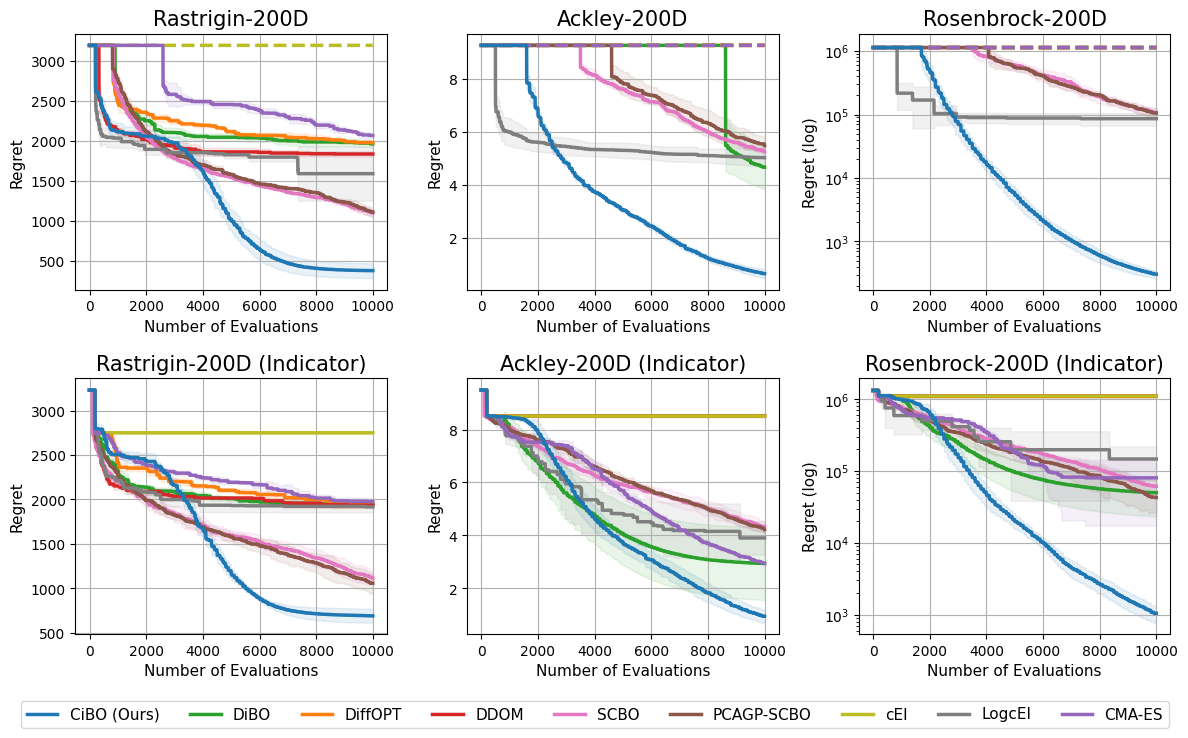

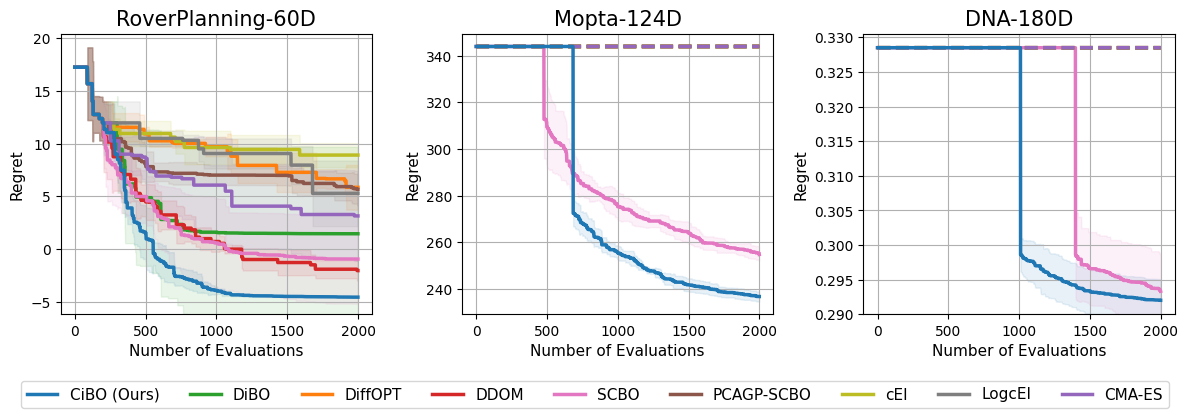

In [13]:
algs_list = ['CiBO (Ours)', 'DiBO','DiffOPT', 'DDOM',  'SCBO','PCAGP-SCBO', 'cEI', 'LogcEI','CMA-ES']
data_list = [outsource_data, dibo_data, diffopt_data, ddom_data, scbo_data, pcagp_scbo_data, cEI_data, logcEI_data, cmaes_data]
color_list = ['#1f77b4',  '#2ca02c','#ff7f0e', '#d62728','#e377c2'  , '#8c564b','#bcbd22' , '#7f7f7f','#9467bd']

plot_paper_results(algs_list, data_list, color_list = color_list)

# Rebuttal. Low initial performance

In [27]:
mean_data = -np.mean(scbo_data['Ackley_true'], axis=0).reshape(-1)
mean_data,len(mean_data)
print(f'scbo {mean_data[[500-1, 1000-1, 2000-1, 4000-1,10000-1]]}')

mean_data = -np.mean(logcEI_data['Ackley_true'], axis=0).reshape(-1)
mean_data,len(mean_data)
print(f'logcEI {mean_data[[500-1, 1000-1, 2000-1, 4000-1,10000-1]]}')

scbo [8.35650087 8.05960598 7.34168427 6.26005456 4.32398502]
logcEI [8.50302565 7.76233353 6.95904816 5.34711281 3.90489693]


In [28]:
mean_data = -np.mean(scbo_data['Rastrigin_true'], axis=0).reshape(-1)
mean_data,len(mean_data)
print(f'scbo {mean_data[[500-1, 1000-1, 2000-1, 4000-1,10000-1]]}')

mean_data = -np.mean(logcEI_data['Rastrigin_true'], axis=0).reshape(-1)
mean_data,len(mean_data)
print(f'logcEI {mean_data[[500-1, 1000-1, 2000-1, 4000-1,10000-1]]}')

scbo [2365.26960409 2202.23582281 1989.35645114 1712.5990822  1112.93986706]
logcEI [2376.27614225 2214.23381756 2084.9997336  1935.79257286 1917.37164029]


In [29]:
mean_data = -np.mean(scbo_data['Rosenbrock_true'], axis=0).reshape(-1)
mean_data,len(mean_data)
print(f'scbo {mean_data[[500-1, 1000-1, 2000-1, 4000-1,10000-1]]}')

mean_data = -np.mean(logcEI_data['Rosenbrock_true'], axis=0).reshape(-1)
mean_data,len(mean_data)
print(f'logcEI {mean_data[[500-1, 1000-1, 2000-1, 4000-1,10000-1]]}')

scbo [907355.64645006 772076.9828823  534046.73313995 277801.40520318
  61065.41137229]
logcEI [754500.41890623 591336.05813535 504644.18787415 255165.93058149
 146894.51206917]
